# Computation of the number of GO term with different annotation between files

In [2]:
import sys
sys.path.append("..")
import panzzer_out_api as poa
import upsetplot
from matplotlib import pyplot

Let's load of files. This notebook was designed for the chromosome 1 of human genome.

In [3]:
chr1_all_nrOFF = poa.parse_panzzer_annotation('../../data/pannzer_output/chr1.all.nr_off.out', 'all_nrOFF')
chr1_long_nrOFF = poa.parse_panzzer_annotation('../../data/pannzer_output/chr1.long.nr_off.out', 'long_nrOFF')

chr1_mane_nrOFF = poa.parse_panzzer_annotation('../../data/pannzer_output/chr1.mane.nr_off.out', 'chr1_mane_nrOFF')
chr1_best_nrOFF = poa.make_best_single_isoform_annotation(chr1_all_nrOFF)

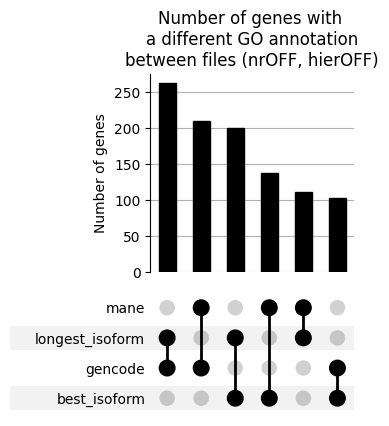

In [4]:
gene_set = [gene for gene in chr1_mane_nrOFF.genes]

data = upsetplot.from_memberships([
    ['gencode','longest_isoform'],
    ['gencode','mane'],
    ['gencode','best_isoform'],
    ['longest_isoform','mane'],
    ['longest_isoform','best_isoform'],
    ['mane','best_isoform'],
],
data = [
    len(poa.genes_with_diff_go_terms(chr1_all_nrOFF, chr1_long_nrOFF, gene_set=gene_set)),
    len(poa.genes_with_diff_go_terms(chr1_all_nrOFF, chr1_mane_nrOFF, gene_set=gene_set)),
    len(poa.genes_with_diff_go_terms(chr1_all_nrOFF, chr1_best_nrOFF, gene_set=gene_set)),
    len(poa.genes_with_diff_go_terms(chr1_long_nrOFF, chr1_mane_nrOFF, gene_set=gene_set)),
    len(poa.genes_with_diff_go_terms(chr1_long_nrOFF, chr1_best_nrOFF, gene_set=gene_set)),
    len(poa.genes_with_diff_go_terms(chr1_mane_nrOFF, chr1_best_nrOFF, gene_set=gene_set)),
]
)


upsetplot.plot(data, sort_by='cardinality', sort_categories_by='input', totals_plot_elements=0 )
pyplot.title('Number of genes with \na different GO annotation\nbetween files (nrOFF, hierOFF)')
pyplot.ylabel('Number of genes')
pyplot.savefig('number_diff_gene_notebook.pdf', format='pdf',bbox_inches="tight")
pyplot.show()
